In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [5]:
cols=['MiscFeature','PoolQC','Fence','Alley']

In [6]:
df.drop(columns=cols,axis=1,inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non

In [8]:
df.shape

(1460, 77)

In [9]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())

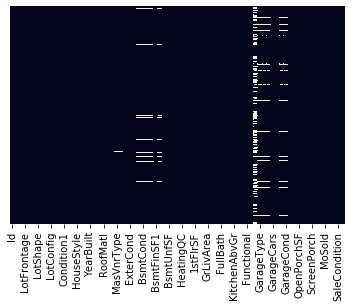

In [10]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [11]:
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])

In [12]:
df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])

In [13]:
df.drop(['GarageYrBlt'],axis=1,inplace=True)

In [14]:
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])

In [15]:
df.shape

(1460, 76)

In [16]:
df.drop(['Id'],axis=1,inplace=True)

In [17]:
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])

In [18]:
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])

In [19]:
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])

In [20]:
df.shape

(1460, 75)

In [21]:
df['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [22]:
df['Electrical']=df['Electrical'].fillna(df['Electrical'].mode()[0])

In [23]:
df['BsmtFinType1']=df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])

In [24]:
df['BsmtFinType1'].isnull().sum()

0

In [25]:
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [26]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [27]:
main_df=df.copy()

In [28]:
test_df=pd.read_csv('formulatedtest.csv')

In [29]:
test_df.shape

(1459, 74)

In [30]:
final_df=pd.concat([df,test_df],axis=0)

/home/rutvik/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [31]:
final_df.shape

(2919, 75)

In [32]:
final_df=category_onehot_multcols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [33]:
final_df.shape

(2919, 236)

In [34]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [35]:
df_Train=final_df.iloc[:1422,:]
df_Test=final_df.iloc[1422:,:]

In [36]:
df_Train.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,0,0,1,1,0,0,0,0,1,0
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,0,0,1,1,0,0,0,0,1,0
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,0,0,1,1,0,0,0,0,1,0
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,0,0,1,0,0,0,0,1,0,0
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,...,0,0,1,1,0,0,0,0,1,0


In [37]:
df_Test.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
1422,848,0,0,1,686.0,0.0,1.0,0.0,162.0,0,...,0,0,1,1,0,0,0,0,0,0
1423,1575,626,0,4,0.0,0.0,0.0,0.0,697.0,0,...,0,0,1,1,0,0,0,0,0,0
1424,1344,0,0,2,457.0,374.0,1.0,0.0,193.0,0,...,1,0,0,0,0,0,0,1,0,0
1425,1252,0,0,3,0.0,0.0,0.0,0.0,1252.0,0,...,0,0,1,0,0,0,0,1,0,0
1426,1223,904,0,3,1000.0,0.0,1.0,0.0,223.0,0,...,0,0,1,1,0,0,0,0,1,0


In [38]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)

/home/rutvik/.local/lib/python3.6/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [39]:
df_Test.shape

(1497, 175)

In [40]:
x_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']

In [41]:
import keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
from keras import backend as K
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))

Using TensorFlow backend.
/home/rutvik/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/rutvik/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/rutvik/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/rutvik/.local/lib/python3.6/site-packages/tensorflow/python

In [43]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 50, init = 'he_uniform',activation='relu',input_dim = 175))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 40, init = 'he_uniform',activation='relu'))

# Adding the third hidden layer
classifier.add(Dense(output_dim = 30, init = 'he_uniform',activation='relu'))
classifier.add(Dense(output_dim = 20, init = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'he_uniform'))

# Compiling the ANN
classifier.compile(loss=root_mean_squared_error, optimizer='Adamax',metrics=['accuracy'])

# Fitting the ANN to the Training set
model_history=classifier.fit(x_train.values, y_train.values,validation_split=0.20, batch_size = 10, nb_epoch = 1200)

/home/rutvik/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=175, units=50, kernel_initializer="he_uniform")`
  """
/home/rutvik/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=40, kernel_initializer="he_uniform")`
  
/home/rutvik/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=30, kernel_initializer="he_uniform")`
  # This is added back by InteractiveShellApp.init_path()
/home/rutvik/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=20, kernel_initializer="he_uniform")`
  if sys.path[0] == '':
/home/rutvik/.local/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: U

Train on 1137 samples, validate on 285 samples
Epoch 1/1200
1137/1137 [==============================] - 0s 380us/step - loss: 142492.1654 - acc: 0.0000e+00 - val_loss: 68490.7058 - val_acc: 0.0000e+00
Epoch 2/1200
1137/1137 [==============================] - 0s 142us/step - loss: 71446.0430 - acc: 0.0000e+00 - val_loss: 63957.0970 - val_acc: 0.0000e+00
Epoch 3/1200
1137/1137 [==============================] - 0s 168us/step - loss: 64899.5502 - acc: 0.0000e+00 - val_loss: 60716.3825 - val_acc: 0.0000e+00
Epoch 4/1200
1137/1137 [==============================] - 0s 160us/step - loss: 61622.6389 - acc: 0.0000e+00 - val_loss: 58500.5430 - val_acc: 0.0000e+00
Epoch 5/1200
1137/1137 [==============================] - 0s 325us/step - loss: 57723.8143 - acc: 0.0000e+00 - val_loss: 55498.5374 - val_acc: 0.0000e+00
Epoch 6/1200
1137/1137 [==============================] - 0s 293us/step - loss: 54135.9970 - acc: 0.0000e+00 - val_loss: 54028.2436 - val_acc: 0.0000e+00
Epoch 7/1200
1137/1137 [====

1137/1137 [==============================] - 0s 147us/step - loss: 34201.6888 - acc: 0.0000e+00 - val_loss: 44255.8866 - val_acc: 0.0000e+00
Epoch 54/1200
1137/1137 [==============================] - 0s 233us/step - loss: 33756.7460 - acc: 0.0000e+00 - val_loss: 43419.1951 - val_acc: 0.0000e+00
Epoch 55/1200
1137/1137 [==============================] - 0s 227us/step - loss: 33646.0394 - acc: 0.0000e+00 - val_loss: 44023.4775 - val_acc: 0.0000e+00
Epoch 56/1200
1137/1137 [==============================] - 0s 195us/step - loss: 33750.6609 - acc: 0.0000e+00 - val_loss: 44076.7992 - val_acc: 0.0000e+00
Epoch 57/1200
1137/1137 [==============================] - 0s 169us/step - loss: 33834.2346 - acc: 0.0000e+00 - val_loss: 43458.9556 - val_acc: 0.0000e+00
Epoch 58/1200
1137/1137 [==============================] - 0s 137us/step - loss: 33226.9340 - acc: 0.0000e+00 - val_loss: 43319.3677 - val_acc: 0.0000e+00
Epoch 59/1200
1137/1137 [==============================] - 0s 170us/step - loss: 337

Epoch 106/1200
1137/1137 [==============================] - 0s 151us/step - loss: 30743.8887 - acc: 0.0000e+00 - val_loss: 44185.0548 - val_acc: 0.0000e+00
Epoch 107/1200
1137/1137 [==============================] - 0s 154us/step - loss: 31190.2997 - acc: 0.0000e+00 - val_loss: 43975.7012 - val_acc: 0.0000e+00
Epoch 108/1200
1137/1137 [==============================] - 0s 148us/step - loss: 31053.4407 - acc: 0.0000e+00 - val_loss: 44506.0877 - val_acc: 0.0000e+00
Epoch 109/1200
1137/1137 [==============================] - 0s 151us/step - loss: 31152.0819 - acc: 0.0000e+00 - val_loss: 44559.4410 - val_acc: 0.0000e+00
Epoch 110/1200
1137/1137 [==============================] - 0s 156us/step - loss: 31346.5384 - acc: 0.0000e+00 - val_loss: 44375.4274 - val_acc: 0.0000e+00
Epoch 111/1200
1137/1137 [==============================] - 0s 169us/step - loss: 31208.4808 - acc: 0.0000e+00 - val_loss: 44583.0526 - val_acc: 0.0000e+00
Epoch 112/1200
1137/1137 [==============================] - 0s 1

1137/1137 [==============================] - 0s 182us/step - loss: 29571.2752 - acc: 0.0000e+00 - val_loss: 45443.4077 - val_acc: 0.0000e+00
Epoch 159/1200
1137/1137 [==============================] - 0s 155us/step - loss: 29303.3016 - acc: 0.0000e+00 - val_loss: 43762.0395 - val_acc: 0.0000e+00
Epoch 160/1200
1137/1137 [==============================] - 0s 156us/step - loss: 29527.5092 - acc: 0.0000e+00 - val_loss: 43965.9929 - val_acc: 0.0000e+00
Epoch 161/1200
1137/1137 [==============================] - 0s 150us/step - loss: 29360.5942 - acc: 0.0000e+00 - val_loss: 43852.8450 - val_acc: 0.0000e+00
Epoch 162/1200
1137/1137 [==============================] - 0s 170us/step - loss: 29147.3278 - acc: 0.0000e+00 - val_loss: 47613.0643 - val_acc: 0.0000e+00
Epoch 163/1200
1137/1137 [==============================] - 0s 158us/step - loss: 28964.6276 - acc: 0.0000e+00 - val_loss: 43353.6103 - val_acc: 0.0000e+00
Epoch 164/1200
1137/1137 [==============================] - 0s 162us/step - los

1137/1137 [==============================] - 0s 180us/step - loss: 27090.1645 - acc: 0.0000e+00 - val_loss: 42311.7850 - val_acc: 0.0000e+00
Epoch 211/1200
1137/1137 [==============================] - 0s 140us/step - loss: 27182.4852 - acc: 0.0000e+00 - val_loss: 43094.6565 - val_acc: 0.0000e+00
Epoch 212/1200
1137/1137 [==============================] - 0s 138us/step - loss: 27057.2113 - acc: 0.0000e+00 - val_loss: 42107.0721 - val_acc: 0.0000e+00
Epoch 213/1200
1137/1137 [==============================] - 0s 142us/step - loss: 27011.9064 - acc: 0.0000e+00 - val_loss: 41707.9606 - val_acc: 0.0000e+00
Epoch 214/1200
1137/1137 [==============================] - 0s 143us/step - loss: 27454.5875 - acc: 0.0000e+00 - val_loss: 42266.5294 - val_acc: 0.0000e+00
Epoch 215/1200
1137/1137 [==============================] - 0s 144us/step - loss: 27292.7672 - acc: 0.0000e+00 - val_loss: 43349.5647 - val_acc: 0.0000e+00
Epoch 216/1200
1137/1137 [==============================] - 0s 142us/step - los

1137/1137 [==============================] - 0s 181us/step - loss: 26058.7656 - acc: 0.0000e+00 - val_loss: 39527.6119 - val_acc: 0.0000e+00
Epoch 263/1200
1137/1137 [==============================] - 0s 160us/step - loss: 25171.1805 - acc: 0.0000e+00 - val_loss: 39816.1626 - val_acc: 0.0000e+00
Epoch 264/1200
1137/1137 [==============================] - 0s 135us/step - loss: 24841.9373 - acc: 0.0000e+00 - val_loss: 39635.4615 - val_acc: 0.0000e+00
Epoch 265/1200
1137/1137 [==============================] - 0s 162us/step - loss: 25383.2074 - acc: 0.0000e+00 - val_loss: 39672.8361 - val_acc: 0.0000e+00
Epoch 266/1200
1137/1137 [==============================] - 0s 135us/step - loss: 25556.3758 - acc: 0.0000e+00 - val_loss: 40517.7472 - val_acc: 0.0000e+00
Epoch 267/1200
1137/1137 [==============================] - 0s 144us/step - loss: 25009.3674 - acc: 0.0000e+00 - val_loss: 39984.6410 - val_acc: 0.0000e+00
Epoch 268/1200
1137/1137 [==============================] - 0s 144us/step - los

1137/1137 [==============================] - 0s 158us/step - loss: 23668.7226 - acc: 0.0000e+00 - val_loss: 37522.2977 - val_acc: 0.0000e+00
Epoch 315/1200
1137/1137 [==============================] - 0s 149us/step - loss: 23320.7148 - acc: 0.0000e+00 - val_loss: 36903.0329 - val_acc: 0.0000e+00
Epoch 316/1200
1137/1137 [==============================] - 0s 154us/step - loss: 23908.8025 - acc: 0.0000e+00 - val_loss: 37154.8055 - val_acc: 0.0000e+00
Epoch 317/1200
1137/1137 [==============================] - 0s 142us/step - loss: 23648.0656 - acc: 0.0000e+00 - val_loss: 39098.1025 - val_acc: 0.0000e+00
Epoch 318/1200
1137/1137 [==============================] - 0s 137us/step - loss: 23465.4729 - acc: 0.0000e+00 - val_loss: 37654.1159 - val_acc: 0.0000e+00
Epoch 319/1200
1137/1137 [==============================] - 0s 142us/step - loss: 23669.6380 - acc: 0.0000e+00 - val_loss: 36907.2530 - val_acc: 0.0000e+00
Epoch 320/1200
1137/1137 [==============================] - 0s 134us/step - los

1137/1137 [==============================] - 0s 132us/step - loss: 22206.6287 - acc: 0.0000e+00 - val_loss: 37044.4707 - val_acc: 0.0035
Epoch 367/1200
1137/1137 [==============================] - 0s 142us/step - loss: 22395.2990 - acc: 0.0000e+00 - val_loss: 36509.8624 - val_acc: 0.0000e+00
Epoch 368/1200
1137/1137 [==============================] - 0s 134us/step - loss: 22243.4883 - acc: 0.0000e+00 - val_loss: 37370.8503 - val_acc: 0.0000e+00
Epoch 369/1200
1137/1137 [==============================] - 0s 134us/step - loss: 24232.1823 - acc: 0.0000e+00 - val_loss: 35256.0196 - val_acc: 0.0000e+00
Epoch 370/1200
1137/1137 [==============================] - 0s 142us/step - loss: 22032.4056 - acc: 0.0000e+00 - val_loss: 34876.5103 - val_acc: 0.0000e+00
Epoch 371/1200
1137/1137 [==============================] - 0s 135us/step - loss: 22599.7323 - acc: 0.0000e+00 - val_loss: 35752.8956 - val_acc: 0.0000e+00
Epoch 372/1200
1137/1137 [==============================] - 0s 140us/step - loss: 2

1137/1137 [==============================] - 0s 141us/step - loss: 20753.1327 - acc: 0.0000e+00 - val_loss: 34520.2780 - val_acc: 0.0000e+00
Epoch 419/1200
1137/1137 [==============================] - 0s 135us/step - loss: 20827.0785 - acc: 0.0000e+00 - val_loss: 36740.6998 - val_acc: 0.0000e+00
Epoch 420/1200
1137/1137 [==============================] - 0s 141us/step - loss: 20732.9481 - acc: 0.0000e+00 - val_loss: 35018.0265 - val_acc: 0.0000e+00
Epoch 421/1200
1137/1137 [==============================] - 0s 135us/step - loss: 21170.7279 - acc: 0.0000e+00 - val_loss: 34820.9413 - val_acc: 0.0000e+00
Epoch 422/1200
1137/1137 [==============================] - 0s 141us/step - loss: 20928.1736 - acc: 0.0000e+00 - val_loss: 33939.9027 - val_acc: 0.0000e+00
Epoch 423/1200
1137/1137 [==============================] - 0s 133us/step - loss: 21153.0590 - acc: 0.0000e+00 - val_loss: 34713.4316 - val_acc: 0.0000e+00
Epoch 424/1200
1137/1137 [==============================] - 0s 136us/step - los

1137/1137 [==============================] - 0s 135us/step - loss: 20022.5783 - acc: 0.0000e+00 - val_loss: 33011.1791 - val_acc: 0.0000e+00
Epoch 471/1200
1137/1137 [==============================] - 0s 141us/step - loss: 20101.6757 - acc: 0.0000e+00 - val_loss: 34743.6419 - val_acc: 0.0000e+00
Epoch 472/1200
1137/1137 [==============================] - 0s 135us/step - loss: 20518.1119 - acc: 0.0000e+00 - val_loss: 33695.5898 - val_acc: 0.0000e+00
Epoch 473/1200
1137/1137 [==============================] - 0s 133us/step - loss: 20471.6099 - acc: 8.7951e-04 - val_loss: 33632.0332 - val_acc: 0.0000e+00
Epoch 474/1200
1137/1137 [==============================] - 0s 140us/step - loss: 19399.2636 - acc: 0.0000e+00 - val_loss: 34886.5775 - val_acc: 0.0000e+00
Epoch 475/1200
1137/1137 [==============================] - 0s 139us/step - loss: 19543.3564 - acc: 0.0000e+00 - val_loss: 33524.6742 - val_acc: 0.0000e+00
Epoch 476/1200
1137/1137 [==============================] - 0s 142us/step - los

1137/1137 [==============================] - 0s 146us/step - loss: 19424.8229 - acc: 0.0000e+00 - val_loss: 32286.6188 - val_acc: 0.0000e+00
Epoch 523/1200
1137/1137 [==============================] - 0s 148us/step - loss: 18787.7605 - acc: 0.0000e+00 - val_loss: 32683.0794 - val_acc: 0.0000e+00
Epoch 524/1200
1137/1137 [==============================] - 0s 157us/step - loss: 18936.6223 - acc: 0.0000e+00 - val_loss: 31763.6317 - val_acc: 0.0000e+00
Epoch 525/1200
1137/1137 [==============================] - 0s 149us/step - loss: 20071.7805 - acc: 0.0000e+00 - val_loss: 32414.6131 - val_acc: 0.0000e+00
Epoch 526/1200
1137/1137 [==============================] - 0s 154us/step - loss: 20096.9785 - acc: 0.0000e+00 - val_loss: 33024.9958 - val_acc: 0.0000e+00
Epoch 527/1200
1137/1137 [==============================] - 0s 143us/step - loss: 19546.8897 - acc: 0.0000e+00 - val_loss: 32433.2086 - val_acc: 0.0000e+00
Epoch 528/1200
1137/1137 [==============================] - 0s 151us/step - los

1137/1137 [==============================] - 0s 136us/step - loss: 18943.7017 - acc: 0.0000e+00 - val_loss: 31848.9879 - val_acc: 0.0000e+00
Epoch 575/1200
1137/1137 [==============================] - 0s 144us/step - loss: 19441.6894 - acc: 0.0000e+00 - val_loss: 35915.6377 - val_acc: 0.0000e+00
Epoch 576/1200
1137/1137 [==============================] - 0s 143us/step - loss: 18599.4162 - acc: 0.0000e+00 - val_loss: 33283.2199 - val_acc: 0.0000e+00
Epoch 577/1200
1137/1137 [==============================] - 0s 149us/step - loss: 18499.1457 - acc: 0.0000e+00 - val_loss: 31884.1928 - val_acc: 0.0000e+00
Epoch 578/1200
1137/1137 [==============================] - 0s 156us/step - loss: 18661.3535 - acc: 0.0000e+00 - val_loss: 31623.1715 - val_acc: 0.0000e+00
Epoch 579/1200
1137/1137 [==============================] - 0s 143us/step - loss: 18350.7263 - acc: 0.0000e+00 - val_loss: 32041.9971 - val_acc: 0.0000e+00
Epoch 580/1200
1137/1137 [==============================] - 0s 141us/step - los

1137/1137 [==============================] - 0s 136us/step - loss: 18245.0093 - acc: 0.0000e+00 - val_loss: 31330.0577 - val_acc: 0.0000e+00
Epoch 627/1200
1137/1137 [==============================] - 0s 142us/step - loss: 17619.6527 - acc: 0.0000e+00 - val_loss: 31895.8288 - val_acc: 0.0000e+00
Epoch 628/1200
1137/1137 [==============================] - 0s 143us/step - loss: 18444.6174 - acc: 0.0000e+00 - val_loss: 33086.7626 - val_acc: 0.0000e+00
Epoch 629/1200
1137/1137 [==============================] - 0s 134us/step - loss: 17806.0992 - acc: 0.0000e+00 - val_loss: 33259.9550 - val_acc: 0.0000e+00
Epoch 630/1200
1137/1137 [==============================] - 0s 142us/step - loss: 17741.3437 - acc: 0.0000e+00 - val_loss: 31190.9754 - val_acc: 0.0000e+00
Epoch 631/1200
1137/1137 [==============================] - 0s 136us/step - loss: 17745.9808 - acc: 0.0000e+00 - val_loss: 32558.6898 - val_acc: 0.0000e+00
Epoch 632/1200
1137/1137 [==============================] - 0s 147us/step - los

1137/1137 [==============================] - 0s 137us/step - loss: 17598.6747 - acc: 0.0000e+00 - val_loss: 30392.7840 - val_acc: 0.0000e+00
Epoch 679/1200
1137/1137 [==============================] - 0s 144us/step - loss: 17316.2445 - acc: 0.0000e+00 - val_loss: 29932.5524 - val_acc: 0.0000e+00
Epoch 680/1200
1137/1137 [==============================] - 0s 146us/step - loss: 16569.9061 - acc: 0.0000e+00 - val_loss: 31383.4779 - val_acc: 0.0000e+00
Epoch 681/1200
1137/1137 [==============================] - 0s 145us/step - loss: 17450.0483 - acc: 0.0000e+00 - val_loss: 32152.3710 - val_acc: 0.0000e+00
Epoch 682/1200
1137/1137 [==============================] - 0s 149us/step - loss: 16829.3549 - acc: 0.0000e+00 - val_loss: 31349.2888 - val_acc: 0.0000e+00
Epoch 683/1200
1137/1137 [==============================] - 0s 147us/step - loss: 17222.1200 - acc: 0.0000e+00 - val_loss: 32909.3307 - val_acc: 0.0000e+00
Epoch 684/1200
1137/1137 [==============================] - 0s 141us/step - los

1137/1137 [==============================] - 0s 144us/step - loss: 15949.4591 - acc: 0.0000e+00 - val_loss: 30655.2640 - val_acc: 0.0000e+00
Epoch 731/1200
1137/1137 [==============================] - 0s 135us/step - loss: 17215.2716 - acc: 0.0000e+00 - val_loss: 32288.2649 - val_acc: 0.0000e+00
Epoch 732/1200
1137/1137 [==============================] - 0s 134us/step - loss: 16646.2483 - acc: 0.0000e+00 - val_loss: 38406.5675 - val_acc: 0.0000e+00
Epoch 733/1200
1137/1137 [==============================] - 0s 143us/step - loss: 17660.1874 - acc: 0.0000e+00 - val_loss: 30218.7027 - val_acc: 0.0000e+00
Epoch 734/1200
1137/1137 [==============================] - 0s 139us/step - loss: 17042.8990 - acc: 0.0000e+00 - val_loss: 32182.2693 - val_acc: 0.0000e+00
Epoch 735/1200
1137/1137 [==============================] - 0s 146us/step - loss: 17361.9343 - acc: 0.0000e+00 - val_loss: 30609.0487 - val_acc: 0.0000e+00
Epoch 736/1200
1137/1137 [==============================] - 0s 153us/step - los

1137/1137 [==============================] - 0s 150us/step - loss: 15827.8180 - acc: 0.0000e+00 - val_loss: 29249.9822 - val_acc: 0.0000e+00
Epoch 783/1200
1137/1137 [==============================] - 0s 139us/step - loss: 15656.1995 - acc: 0.0000e+00 - val_loss: 35619.2314 - val_acc: 0.0000e+00
Epoch 784/1200
1137/1137 [==============================] - 0s 153us/step - loss: 16516.3597 - acc: 0.0000e+00 - val_loss: 30054.0699 - val_acc: 0.0000e+00
Epoch 785/1200
1137/1137 [==============================] - 0s 145us/step - loss: 17302.6245 - acc: 0.0000e+00 - val_loss: 30278.1868 - val_acc: 0.0000e+00
Epoch 786/1200
1137/1137 [==============================] - 0s 143us/step - loss: 16056.2955 - acc: 8.7951e-04 - val_loss: 30617.9379 - val_acc: 0.0000e+00
Epoch 787/1200
1137/1137 [==============================] - 0s 137us/step - loss: 17043.9291 - acc: 0.0000e+00 - val_loss: 30485.5697 - val_acc: 0.0000e+00
Epoch 788/1200
1137/1137 [==============================] - 0s 142us/step - los

1137/1137 [==============================] - 0s 155us/step - loss: 16106.0668 - acc: 0.0000e+00 - val_loss: 31556.6068 - val_acc: 0.0000e+00
Epoch 835/1200
1137/1137 [==============================] - 0s 144us/step - loss: 16430.3910 - acc: 0.0000e+00 - val_loss: 28473.2263 - val_acc: 0.0000e+00
Epoch 836/1200
1137/1137 [==============================] - 0s 148us/step - loss: 15797.1370 - acc: 8.7951e-04 - val_loss: 29503.0418 - val_acc: 0.0000e+00
Epoch 837/1200
1137/1137 [==============================] - 0s 146us/step - loss: 16120.0188 - acc: 0.0000e+00 - val_loss: 28652.7686 - val_acc: 0.0000e+00
Epoch 838/1200
1137/1137 [==============================] - 0s 147us/step - loss: 16004.9279 - acc: 0.0000e+00 - val_loss: 28994.3481 - val_acc: 0.0000e+00
Epoch 839/1200
1137/1137 [==============================] - 0s 154us/step - loss: 15485.3905 - acc: 0.0000e+00 - val_loss: 30488.4788 - val_acc: 0.0000e+00
Epoch 840/1200
1137/1137 [==============================] - 0s 150us/step - los

1137/1137 [==============================] - 0s 144us/step - loss: 15755.6812 - acc: 0.0000e+00 - val_loss: 30946.5010 - val_acc: 0.0000e+00
Epoch 887/1200
1137/1137 [==============================] - 0s 145us/step - loss: 15015.6564 - acc: 0.0000e+00 - val_loss: 29343.7306 - val_acc: 0.0000e+00
Epoch 888/1200
1137/1137 [==============================] - 0s 146us/step - loss: 14968.3342 - acc: 0.0000e+00 - val_loss: 29457.8245 - val_acc: 0.0000e+00
Epoch 889/1200
1137/1137 [==============================] - 0s 143us/step - loss: 15593.0634 - acc: 0.0000e+00 - val_loss: 30242.1984 - val_acc: 0.0000e+00
Epoch 890/1200
1137/1137 [==============================] - 0s 140us/step - loss: 14860.3934 - acc: 0.0000e+00 - val_loss: 29403.2456 - val_acc: 0.0000e+00
Epoch 891/1200
1137/1137 [==============================] - 0s 135us/step - loss: 15803.0758 - acc: 0.0000e+00 - val_loss: 29701.6864 - val_acc: 0.0000e+00
Epoch 892/1200
1137/1137 [==============================] - 0s 144us/step - los

1137/1137 [==============================] - 0s 137us/step - loss: 14243.8395 - acc: 0.0000e+00 - val_loss: 29299.3063 - val_acc: 0.0000e+00
Epoch 939/1200
1137/1137 [==============================] - 0s 145us/step - loss: 14992.9759 - acc: 0.0000e+00 - val_loss: 30450.8855 - val_acc: 0.0000e+00
Epoch 940/1200
1137/1137 [==============================] - 0s 147us/step - loss: 14252.2705 - acc: 0.0000e+00 - val_loss: 32765.0777 - val_acc: 0.0000e+00
Epoch 941/1200
1137/1137 [==============================] - 0s 152us/step - loss: 14878.5741 - acc: 0.0000e+00 - val_loss: 30900.1938 - val_acc: 0.0000e+00
Epoch 942/1200
1137/1137 [==============================] - 0s 157us/step - loss: 14408.9685 - acc: 0.0000e+00 - val_loss: 32366.1892 - val_acc: 0.0000e+00
Epoch 943/1200
1137/1137 [==============================] - 0s 141us/step - loss: 14358.0591 - acc: 0.0000e+00 - val_loss: 29878.7597 - val_acc: 0.0000e+00
Epoch 944/1200
1137/1137 [==============================] - 0s 150us/step - los

1137/1137 [==============================] - 0s 143us/step - loss: 14392.2491 - acc: 0.0000e+00 - val_loss: 29941.1426 - val_acc: 0.0000e+00
Epoch 991/1200
1137/1137 [==============================] - 0s 136us/step - loss: 13861.9774 - acc: 0.0000e+00 - val_loss: 29818.7009 - val_acc: 0.0000e+00
Epoch 992/1200
1137/1137 [==============================] - 0s 141us/step - loss: 14869.9156 - acc: 0.0000e+00 - val_loss: 29685.3956 - val_acc: 0.0000e+00
Epoch 993/1200
1137/1137 [==============================] - 0s 145us/step - loss: 14791.4860 - acc: 0.0000e+00 - val_loss: 29894.3283 - val_acc: 0.0000e+00
Epoch 994/1200
1137/1137 [==============================] - 0s 141us/step - loss: 13911.9092 - acc: 0.0000e+00 - val_loss: 32144.8549 - val_acc: 0.0000e+00
Epoch 995/1200
1137/1137 [==============================] - 0s 138us/step - loss: 14655.9831 - acc: 0.0000e+00 - val_loss: 30736.1206 - val_acc: 0.0000e+00
Epoch 996/1200
1137/1137 [==============================] - 0s 147us/step - los

1137/1137 [==============================] - 0s 137us/step - loss: 13920.6126 - acc: 0.0000e+00 - val_loss: 31059.2053 - val_acc: 0.0000e+00
Epoch 1043/1200
1137/1137 [==============================] - 0s 136us/step - loss: 13492.9792 - acc: 0.0000e+00 - val_loss: 30712.2940 - val_acc: 0.0000e+00
Epoch 1044/1200
1137/1137 [==============================] - 0s 144us/step - loss: 13987.4520 - acc: 0.0000e+00 - val_loss: 30201.5731 - val_acc: 0.0000e+00
Epoch 1045/1200
1137/1137 [==============================] - 0s 146us/step - loss: 14940.7762 - acc: 0.0000e+00 - val_loss: 29487.7764 - val_acc: 0.0000e+00
Epoch 1046/1200
1137/1137 [==============================] - 0s 146us/step - loss: 13504.0920 - acc: 0.0000e+00 - val_loss: 31184.4606 - val_acc: 0.0000e+00
Epoch 1047/1200
1137/1137 [==============================] - 0s 143us/step - loss: 14220.9032 - acc: 0.0000e+00 - val_loss: 30124.0270 - val_acc: 0.0000e+00
Epoch 1048/1200
1137/1137 [==============================] - 0s 135us/step

1137/1137 [==============================] - 0s 143us/step - loss: 14041.4341 - acc: 8.7951e-04 - val_loss: 30371.7279 - val_acc: 0.0000e+00
Epoch 1095/1200
1137/1137 [==============================] - 0s 145us/step - loss: 13903.9414 - acc: 0.0000e+00 - val_loss: 30807.7361 - val_acc: 0.0000e+00
Epoch 1096/1200
1137/1137 [==============================] - 0s 147us/step - loss: 14320.4288 - acc: 0.0000e+00 - val_loss: 31432.7951 - val_acc: 0.0000e+00
Epoch 1097/1200
1137/1137 [==============================] - 0s 154us/step - loss: 14024.1243 - acc: 8.7951e-04 - val_loss: 31921.4385 - val_acc: 0.0000e+00
Epoch 1098/1200
1137/1137 [==============================] - 0s 147us/step - loss: 13893.3236 - acc: 0.0000e+00 - val_loss: 30679.8737 - val_acc: 0.0000e+00
Epoch 1099/1200
1137/1137 [==============================] - 0s 144us/step - loss: 13216.4473 - acc: 0.0000e+00 - val_loss: 29643.5175 - val_acc: 0.0000e+00
Epoch 1100/1200
1137/1137 [==============================] - 0s 137us/step

1137/1137 [==============================] - 0s 173us/step - loss: 13705.2566 - acc: 0.0000e+00 - val_loss: 31739.6230 - val_acc: 0.0000e+00
Epoch 1147/1200
1137/1137 [==============================] - 0s 153us/step - loss: 13421.1346 - acc: 0.0000e+00 - val_loss: 31140.0016 - val_acc: 0.0000e+00
Epoch 1148/1200
1137/1137 [==============================] - 0s 170us/step - loss: 14258.6517 - acc: 0.0000e+00 - val_loss: 30108.4142 - val_acc: 0.0000e+00
Epoch 1149/1200
1137/1137 [==============================] - 0s 146us/step - loss: 14110.8932 - acc: 0.0000e+00 - val_loss: 32166.3882 - val_acc: 0.0000e+00
Epoch 1150/1200
1137/1137 [==============================] - 0s 151us/step - loss: 13461.7789 - acc: 0.0000e+00 - val_loss: 31005.3794 - val_acc: 0.0000e+00
Epoch 1151/1200
1137/1137 [==============================] - 0s 158us/step - loss: 13936.9650 - acc: 8.7951e-04 - val_loss: 30517.8819 - val_acc: 0.0000e+00
Epoch 1152/1200
1137/1137 [==============================] - 0s 176us/step

Epoch 1198/1200
1137/1137 [==============================] - 0s 160us/step - loss: 12845.8738 - acc: 0.0000e+00 - val_loss: 31070.4603 - val_acc: 0.0000e+00
Epoch 1199/1200
1137/1137 [==============================] - 0s 154us/step - loss: 13496.2261 - acc: 0.0000e+00 - val_loss: 31796.1181 - val_acc: 0.0000e+00
Epoch 1200/1200
1137/1137 [==============================] - 0s 156us/step - loss: 13657.7408 - acc: 0.0000e+00 - val_loss: 32093.8847 - val_acc: 0.0000e+00


In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# regressor = RandomForestRegressor(n_estimators = 10,random_state=0)

In [ ]:
# regressor.fit(X_train,y_train)

In [44]:
y_pred=classifier.predict(df_Test)

In [ ]:
y_pred

In [45]:
pred=pd.DataFrame(y_pred)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission9.csv',index=False)